# Inaugural Project

Imports and set magics:

In [11]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [12]:
#In this question, we want to construct a function which solves equation (1). 

#Firstly, the utility function is defined by: 
def utility(w, l, m = 1, v = 10, e = 0.3, t0 = 0.4, t1 = 0.1, k = 0.4):
    tax = t0*w*l+t1*np.fmax(w*l-k,0)
    c = m+w*l-tax
    utility = np.log(c)-v*l**(1+1/e)/(1+1/e)
    return utility,c, tax

#Next a function is created in order to maximize utility:
def solveconsumerproblem(w, m = 1, v = 10, e = 0.3, t0 = 0.4, t1 = 0.1, k = 0.4,\
                         N=100, callableoutput=False, tax=False):


#Now, we want to create a set of emply local lists in order to store the outputs. 
    c_star = [0]
    l_star = [0]
    t_star = [0]
    utility_star = [-np.inf]

# Creating a range for labour in order to examine the utility for a given number of elements. 
    Range = np.linspace(0, 1, N)
    for i in Range:
        utility_temp = utility(l = i, w = w, e = e, t0 = t0, t1 = t1, k = k)
        if utility_temp[0]>utility_star:
            utility_star[0]=utility_temp[0]
            l_star[0] = i
            c_star[0] = utility_temp[1]
            t_star[0] = utility_temp[2]

#Setting requirements for tax, whether to display or not
    if tax == False:
        if callableoutput == False:
            print(f"It is found that (l*,c*) = ({l_star[0]:.3}, {c_star[0]:.3}) meaning that the optimal utility is given by u(c*,l*) = {utility_star[0]:.3}")  
        else:
            return utility_star[0], l_star[0], c_star[0]
    
    if tax == True:
            return utility_star[0], l_star[0], c_star[0], t_star[0]

solveconsumerproblem(w=0.6, tax=False, callableoutput=False)

It is found that (l*,c*) = (0.354, 1.13) meaning that the optimal utility is given by u(c*,l*) = 0.0943


# Question 2

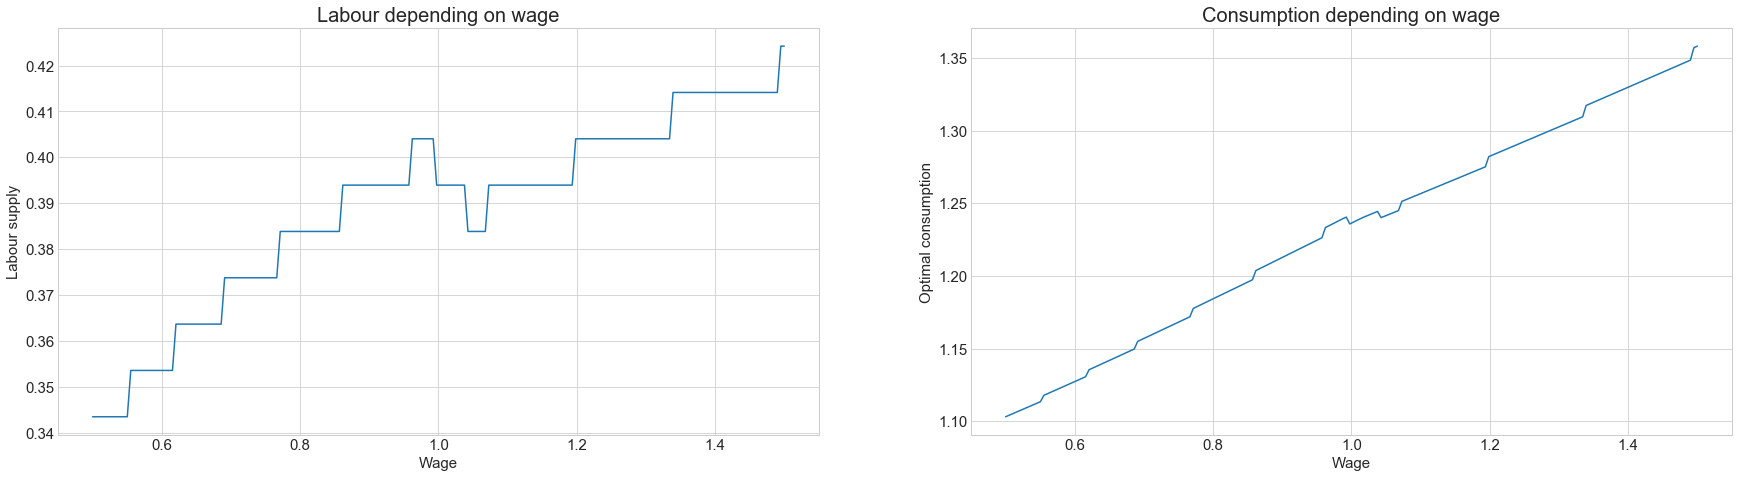

In [13]:
#Now we want to plot l* and c* as functions of w in the range 0.5 to 1.5

#In order to do so, we first define the range of w as: 
w_range = np.linspace(0.5, 1.5, 200) 

#As before, we create empty lists for later use:
l_list = []
c_list = []

#Lastly, we loop the w_range as follows:
for i in w_range:
    l_list.append(solveconsumerproblem(w = i, callableoutput=True)[1])
    c_list.append(solveconsumerproblem(w = i, callableoutput=True)[2])

#Now, the figures are ready to be created. This is done by: 


##//fig = plt.figure(figsize=(5,5))

# Fiure 1
##ax = fig.add_subplot(2,1,1)
##plt.plot(w_range,l_list)
##ax.set_xlabel('Wage')
##ax.set_ylabel("Labour")


#Figure 2
##ax = fig.add_subplot(2,1,2)
##ax.plot(w_range, c_list)
##ax.set_xlabel('Wage')
##ax.set_ylabel('Consumption')
# plot the results///

fig = plt.figure(figsize=(30,7.5))
plt.style.use('seaborn-whitegrid')

# first plot including the labor supply depending on the wage
plot_left = fig.add_subplot(1,2,1)
plot_left.plot(w_range,l_list)
plot_left.set_title("Labour depending on wage",fontsize=20)
plot_left.set_xlabel("Wage",fontsize=15)
plot_left.set_ylabel("Labour supply",fontsize=15)
plot_left.axes.tick_params(labelsize=15)

# second plot including the consumptions depending on the wage
plot_right = fig.add_subplot(1,2,2) 
plot_right.plot(w_range,c_list)
plot_right.set_title("Consumption depending on wage",fontsize=20)
plot_right.set_xlabel("Wage",fontsize=15)
plot_right.set_ylabel("Optimal consumption",fontsize=15)
plot_right.axes.tick_params(labelsize=15)

# Question 3

In [14]:
#In order to calculate the tax revenue, we need to find the wage-level for different types of consumers. This is done by following:

np.random.seed(seed = 1337)
wage_list = np.random.uniform(low = 0.5, high = 1.5, size = 10000)

#Next, we wish to find the tax-revenue for a set of different wage-levels and parameters as:
def taxrevenue(wages, t0, t1, k, e = 0.3):

#Again, an empty list is generated for output:
    tax_payments = []

#As seen before, we want to create a loop for wages, adding the indiviaual tax element in the function.
    for i in wages:
       tax_payments.append(solveconsumerproblem(w = i, t0=t0, t1=t1, e=e, k=k, callableoutput = True, tax = True)[-1]) 
    
#The sum of all calculated individual taxpayments are used in order to find the aggregated tax revenue:
    return np.sum(tax_payments)

#Last, we find the total tax revenue as:
print("The aggregated tax revenue is calculated as " + \
str(round(taxrevenue(wages = wage_list, t0=0.4, t1=0.1, k=0.4, e=0.3),2)))

# Question 4

In [ ]:
#Now, we wish to examine the aggregated tax revenue for epsilon=0.1. This is solely done by running the above function, setting epsilon=0.1 as follows:

print("For epsilon=0.1, the aggregated tax revenue is " + \
str(round(taxrevenue(wages = wage_list, t0=0.4, t1=0.1, k=0.4, e=0.1),2)))

# Question 5

In [ ]:
import pandas as pd
import scipy.optimize as optimize
#In oder to maximize the tax revenue, we are using Powell's method setting e=0.3 as this is the last given value for epsilon, hence we expect this is the one to use as nothing else is given. 
#First, we define the new variable:
def mtaxrev(paraVec, wages = wage_list):
    
    #In order to use a minimizer for the solution, we arrange a set of vectors for the different parameters given by: 
     t0 = paraVec[0]
     t1 = paraVec[1]
     k = paraVec[2]
     #To solve the problew using the minimizer, we multiply tax revenue with -1 and set up a range for kappa, to secure this value is non-negative:
    # TTR = -1*taxrev(wages = wages, t0 = t0, t1= t1, k=k)
     #if k < 0:
      #    return 1
     #else:
      #    return TTR

#initial_guess=[0., 0., 0.]

#We then solve the problem using the following code:
#sol_taxrev = optimize.minimize('mtaxrev', initial_guess, method = 'Powell')
 #    return _minimize_neldermead('mtaxrev', initial_guess)

# print('The expected tax revenue is then ' + str(round(-sol_taxrev['fun'],3)))

#print('In addition, we calculate the parameter-vales to be given by t_0 = '+ str(round(sol_taxrev['x'][0],3)) + ' t_1 = '+ str(round(sol_taxrev['x'][1],3)) + \
#' and kappa = '+ str((sol_taxrevenue['x'][2])))



initial_guess = [0.1, 0.1, 0.1]
result = optimize.minimize(fun=mtaxrev, x0=initial_guess, method='BFGS')
print(result.x)

# Conclusion